In [1]:
# https://ppiazi.tistory.com/entry/python-cyclomatic-complexity-%EB%AA%A8%EB%93%88-lizard

In [2]:
# https://github.com/terryyin/lizard

In [3]:
# pip install cognitive_complexity

In [20]:
#customized preprocessing pkg
import preprocess as pp
import pandas as pd
import numpy as np
import pickle
import ast
from cognitive_complexity.api import get_cognitive_complexity
import pprint
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

### 소스코드 complexity 계산

In [2]:
# 파일 불러오기
with open('../../data/complexity_df.pkl', 'rb') as f:
    complexity_df = pickle.load(f)

In [21]:
# 파일 불러오기
with open('../../data/complexity_python_df.pkl', 'rb') as f:
    complexity_python_df = pickle.load(f)

In [22]:
complexity_python_df.head()

,id,cdate,title,body
0,77332768,2023-10-20,How do I find all the occurence of a specific ...,<p>It's my first time scraping a website</p>\n...
1,77579834,2023-11-30,Strange behaviour in google earth,<p>I searched this over the internet and found...
2,77579876,2023-11-30,How to fix empty table of content in Pylatex?,<p>I'm trying to generate a pdf file using pyl...
3,77579877,2023-11-30,How to make an asynchronous principle of task ...,"<p>I have a problem, do you have any ideas for..."
4,77579884,2023-11-30,convert CST time string to datetime object,<p>How can I covert a time string which contai...


In [23]:
complexity_python_df['cdate'].max()

'2023-11-30'

In [24]:
htmlp = pp.HTMLParser()
codep = pp.CodeSectionParser()

In [25]:
complexity_python_df['c_h_body'] = complexity_python_df['body'].apply(lambda x : htmlp.clean_html_str(x))

In [26]:
complexity_python_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401950 entries, 0 to 401949
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        401950 non-null  int64 
 1   cdate     401950 non-null  object
 2   title     401950 non-null  object
 3   body      401950 non-null  object
 4   c_h_body  401950 non-null  object
dtypes: int64(1), object(4)
memory usage: 15.3+ MB


In [27]:
complexity_python_df['c_body'] = complexity_python_df['body'].apply(lambda x : codep(x))

In [28]:
complexity_python_df

,id,cdate,title,body,c_h_body,c_body
0,77332768,2023-10-20,How do I find all the occurence of a specific ...,<p>It's my first time scraping a website</p>\n...,It's my first time scraping a website\nIn a bi...,{'code_sections': []}
1,77579834,2023-11-30,Strange behaviour in google earth,<p>I searched this over the internet and found...,I searched this over the internet and found no...,{'code_sections': []}
2,77579876,2023-11-30,How to fix empty table of content in Pylatex?,<p>I'm trying to generate a pdf file using pyl...,I'm trying to generate a pdf file using pylate...,"{'code_sections': [{'off_beg': 179, 'off_end':..."
3,77579877,2023-11-30,How to make an asynchronous principle of task ...,"<p>I have a problem, do you have any ideas for...","I have a problem, do you have any ideas for a ...",{'code_sections': []}
4,77579884,2023-11-30,convert CST time string to datetime object,<p>How can I covert a time string which contai...,How can I covert a time string which contains ...,"{'code_sections': [{'off_beg': 88, 'off_end': ..."
...,...,...,...,...,...,...
401945,69799084,2021-11-01,How to fetch the timestamps at which each user...,<p>I'm working on a project and would like to ...,I'm working on a project and would like to kno...,"{'code_sections': [{'off_beg': 285, 'off_end':..."
401946,69799105,2021-11-01,Insert value 1 in pandas Dataframe till one co...,<p>I have an Dataframe with columns below minu...,I have an Dataframe with columns below minus t...,{'code_sections': []}
401947,69799108,2021-11-01,How to collect elements of each position in br...,"<pre><code> {1,2,3},{4,5,6},{7,8,9},{10,11,1...","{1,2,3},{4,5,6},{7,8,9},{10,11,12}...\n\nI ...","{'code_sections': [{'off_beg': 11, 'off_end': ..."
401948,69799110,2021-11-01,Python garbage collection inside loop does not...,<p>I am trying to run a Python script that loo...,I am trying to run a Python script that looks ...,"{'code_sections': [{'off_beg': 80, 'off_end': ..."


In [29]:
complexity_python_src = complexity_python_df[['id', 'c_body']]

In [30]:
complexity_python_src['code_len'] = complexity_python_src['c_body'].apply(lambda x: len(x['code_sections']))

/tmp/ipykernel_997759/2692464613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complexity_python_src['code_len'] = complexity_python_src['c_body'].apply(lambda x: len(x['code_sections']))


In [31]:
complexity_python_src = complexity_python_src[complexity_python_src['code_len']>0]

In [32]:
complexity_python_src.head(5)

,id,c_body,code_len
2,77579876,"{'code_sections': [{'off_beg': 179, 'off_end':...",2
4,77579884,"{'code_sections': [{'off_beg': 88, 'off_end': ...",1
6,77579895,"{'code_sections': [{'off_beg': 482, 'off_end':...",4
7,77579920,"{'code_sections': [{'off_beg': 326, 'off_end':...",2
8,77579932,"{'code_sections': [{'off_beg': 326, 'off_end':...",2


In [33]:
src_df = pd.DataFrame(columns = ['id', 'src'])
def code_explode(row) : 
    global src_df
    row['id']
    src_arr = []
    for i in range(row['code_len']):
        tmp_src_arr = []
        tmp_src_arr.append(row['id'])
        tmp_src_arr.append(row['c_body']['code_sections'][i]['span_str'])
        src_df = src_df.append(pd.Series(tmp_src_arr, index=src_df.columns), ignore_index=True)
    return True
        

In [34]:
# bert_src_ex = bert_src[['q_id', 'q_prep_text']].apply(pd.Series.explode)
complexity_python_src.apply(code_explode, axis = 1)

2         True
4         True
6         True
7         True
8         True
          ... 
401943    True
401945    True
401947    True
401948    True
401949    True
Length: 300585, dtype: bool

In [35]:
src_df.reset_index(inplace=True)

In [36]:
src_df.head()

,index,id,src
0,0,77579876,doc.append(NewPage())\ndoc.append(Command('tab...
1,1,77579876,"doc.generate_pdf(filepath=filepath, compiler=p..."
2,2,77579884,"ts = ""Wed Dec 31 18:00:00 CST 1969""\n"
3,3,77579895,LABELS OUTPUT ...
4,4,77579895,"class CNN(nn.Module):\n def __init__(self, ..."


In [19]:
for i in range(src_df.shape[0]):
    idx = src_df.iloc[i, 0]
    qid = src_df.iloc[i, 1]
    src = src_df.iloc[i, 2]
    file_nm = str(idx)+'_' + str(qid)+'.py'
    with open('../../data/src/'+file_nm, 'wb') as f:
        f.write(src.encode())


In [20]:
# https://github.com/rohaquinlop/complexipy

In [62]:
# pip install complexipy

In [ ]:
# !complexipy /home/mghan/sopjt/git/data/src/3_74963438.py -l file -o

In [28]:
# cyclomatic은 모든 언어 가능 but cognitive는 언어별로 따로 분석해야함
# 하려면 소나큐브 사야 함 
# pyhon 기준으로는 조금 삽질하면 할 수 있을 듯.... 해보고 유의미하면 소나큐브 고?


### complexity 결과 확인

In [37]:
path = "../../data/src/"
file_list = os.listdir(path)
file_list_csv = [file for file in file_list if file.endswith(".csv")]

# print ("file_list_csv: {}".format(file_list_csv))

In [38]:
calc_com_df = pd.DataFrame(columns = ['Path', 'File Name', 'Cognitive Complexity'])
for file_nm in file_list_csv :
    tmp = pd.read_csv(path+file_nm)
    calc_com_df = pd.concat([calc_com_df, tmp], axis = 0)

In [39]:
calc_com_df.head()

,Path,File Name,Cognitive Complexity
0,155463_75376741.py,155463_75376741.py,0
0,184681_74916523.py,184681_74916523.py,0
0,47765_76834699.py,47765_76834699.py,0
0,8941_77522191.py,8941_77522191.py,1
0,215087_74591873.py,215087_74591873.py,3


In [40]:
calc_com_df.reset_index(drop=True, inplace=True)

In [41]:
calc_com_df.head()

,Path,File Name,Cognitive Complexity
0,155463_75376741.py,155463_75376741.py,0
1,184681_74916523.py,184681_74916523.py,0
2,47765_76834699.py,47765_76834699.py,0
3,8941_77522191.py,8941_77522191.py,1
4,215087_74591873.py,215087_74591873.py,3


In [42]:
calc_com_df['index'] = calc_com_df['Path'].apply(lambda x : x.split('_')[0])
# calc_com_df['Path'].apply(lambda x : [  for i in x.split('_')])

In [43]:
calc_com_df['id'] = calc_com_df['Path'].apply(lambda x : x.split('_')[1].split('.')[0])

In [44]:
calc_com_df.sort_values(by = ['index', 'id'])

,Path,File Name,Cognitive Complexity,index,id
379075,0_74574281.py,0_74574281.py,6,0,74574281
41501,0_77469596.py,0_77469596.py,0,0,77469596
167637,0_77579876.py,0_77579876.py,0,0,77579876
59352,1_74574281.py,1_74574281.py,0,1,74574281
19799,1_77579876.py,1_77579876.py,0,1,77579876
...,...,...,...,...,...
221980,99992_76156024.py,99992_76156024.py,8,99992,76156024
123926,99995_76156046.py,99995_76156046.py,0,99995,76156046
104785,99996_76156076.py,99996_76156076.py,0,99996,76156076
68050,99997_76156076.py,99997_76156076.py,0,99997,76156076


In [45]:
calc_com_df[['index', 'id', 'Cognitive Complexity']] = calc_com_df[['index', 'id', 'Cognitive Complexity']].astype('int')

In [46]:
src_df[['index', 'id']] = src_df[['index', 'id']].astype('int')

In [47]:
calc_com_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394573 entries, 0 to 394572
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Path                  394573 non-null  object
 1   File Name             394573 non-null  object
 2   Cognitive Complexity  394573 non-null  int64 
 3   index                 394573 non-null  int64 
 4   id                    394573 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 15.1+ MB


In [48]:
calc_com_df.sort_values(by = ['index', 'id'])

,Path,File Name,Cognitive Complexity,index,id
379075,0_74574281.py,0_74574281.py,6,0,74574281
41501,0_77469596.py,0_77469596.py,0,0,77469596
167637,0_77579876.py,0_77579876.py,0,0,77579876
59352,1_74574281.py,1_74574281.py,0,1,74574281
19799,1_77579876.py,1_77579876.py,0,1,77579876
...,...,...,...,...,...
340550,513442_70728507.py,513442_70728507.py,0,513442,70728507
364196,513443_70728524.py,513443_70728524.py,0,513443,70728524
380338,513444_70728524.py,513444_70728524.py,0,513444,70728524
250443,513447_70728593.py,513447_70728593.py,3,513447,70728593


In [49]:
calc_com_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394573 entries, 0 to 394572
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Path                  394573 non-null  object
 1   File Name             394573 non-null  object
 2   Cognitive Complexity  394573 non-null  int64 
 3   index                 394573 non-null  int64 
 4   id                    394573 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 15.1+ MB


In [50]:
src_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603258 entries, 0 to 603257
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   index   603258 non-null  int64 
 1   id      603258 non-null  int64 
 2   src     603258 non-null  object
dtypes: int64(2), object(1)
memory usage: 13.8+ MB


In [51]:
calc_com_df = pd.merge(src_df,  calc_com_df, how = 'left', on = ['index', 'id'])

In [52]:
calc_com_df = pd.merge(complexity_python_df[['id', 'cdate']], calc_com_df, on = 'id')

In [53]:
calc_com_df.head()

,id,cdate,index,src,Path,File Name,Cognitive Complexity
0,77579876,2023-11-30,0,doc.append(NewPage())\ndoc.append(Command('tab...,0_77579876.py,0_77579876.py,0.0
1,77579876,2023-11-30,1,"doc.generate_pdf(filepath=filepath, compiler=p...",1_77579876.py,1_77579876.py,0.0
2,77579884,2023-11-30,2,"ts = ""Wed Dec 31 18:00:00 CST 1969""\n",2_77579884.py,2_77579884.py,0.0
3,77579895,2023-11-30,3,LABELS OUTPUT ...,NaN,NaN,NaN
4,77579895,2023-11-30,4,"class CNN(nn.Module):\n def __init__(self, ...",4_77579895.py,4_77579895.py,0.0


In [54]:
# 일자별로 아예 소스가 수행되지 않는 건 
calc_ed_com_df = calc_com_df[~calc_com_df['Path'].isna()]

In [55]:
calc_ed_com_df = calc_ed_com_df.sort_values(by = ['cdate', 'id', 'Cognitive Complexity'], ascending = [True, True, False]).groupby('id').head(1)

In [56]:
calc_ed_com_df.head()

,id,cdate,index,src,Path,File Name,Cognitive Complexity
395616,70626487,2022-01-07,395616,"logging.info(f""({self.instance_desc}) {message...",395616_70626487.py,395616_70626487.py,0.0
395618,70626511,2022-01-07,395618,data =xr.open_dataset(SomeFile)\n\nSlicedData ...,395618_70626511.py,395618_70626511.py,0.0
513098,70725421,2022-01-15,513098,"""a@gmail.com"" == ""A@GmaiL.com""\n",513098_70725421.py,513098_70725421.py,0.0
513102,70725426,2022-01-15,513102,#pip install eurostat\nimport pandas as pd\nim...,513102_70725426.py,513102_70725426.py,0.0
513103,70725440,2022-01-15,513103,"df = pd.read_csv(""data.csv"")\ncoefs = np.polyf...",513103_70725440.py,513103_70725440.py,0.0


In [57]:
calc_ed_com_df = calc_ed_com_df.groupby('cdate').mean()[['Cognitive Complexity']].reset_index()

In [58]:
calc_ed_com_df.head()

,cdate,Cognitive Complexity
0,2022-01-07,0.000000
1,2022-01-15,0.888889
2,2022-01-16,1.309623
3,2022-01-17,2.142857
4,2022-01-26,1.211765


In [59]:
calc_ed_com_box_df = calc_ed_com_df.copy()

In [60]:
calc_ed_com_box_df['yyyymm'] = calc_ed_com_box_df['cdate'].str[:7]

In [61]:
ym_list = calc_ed_com_box_df['yyyymm'].unique()

In [62]:
[calc_ed_com_box_df[calc_ed_com_box_df['yyyymm']==x]  for x in ym_list]

[        cdate  Cognitive Complexity   yyyymm
 0  2022-01-07              0.000000  2022-01
 1  2022-01-15              0.888889  2022-01
 2  2022-01-16              1.309623  2022-01
 3  2022-01-17              2.142857  2022-01
 4  2022-01-26              1.211765  2022-01
 5  2022-01-27              1.161446  2022-01
 6  2022-01-28              1.559494  2022-01
 7  2022-01-29              1.409774  2022-01
 8  2022-01-30              1.829876  2022-01
 9  2022-01-31              1.238342  2022-01,
          cdate  Cognitive Complexity   yyyymm
 10  2022-02-01              1.464824  2022-02
 11  2022-02-02              1.353403  2022-02
 12  2022-02-03              1.121005  2022-02
 13  2022-02-04              1.593350  2022-02
 14  2022-02-05              1.485185  2022-02
 15  2022-02-06              1.315574  2022-02
 16  2022-02-07              1.942928  2022-02
 17  2022-02-08              1.685930  2022-02
 18  2022-02-09              1.533186  2022-02
 19  2022-02-10        

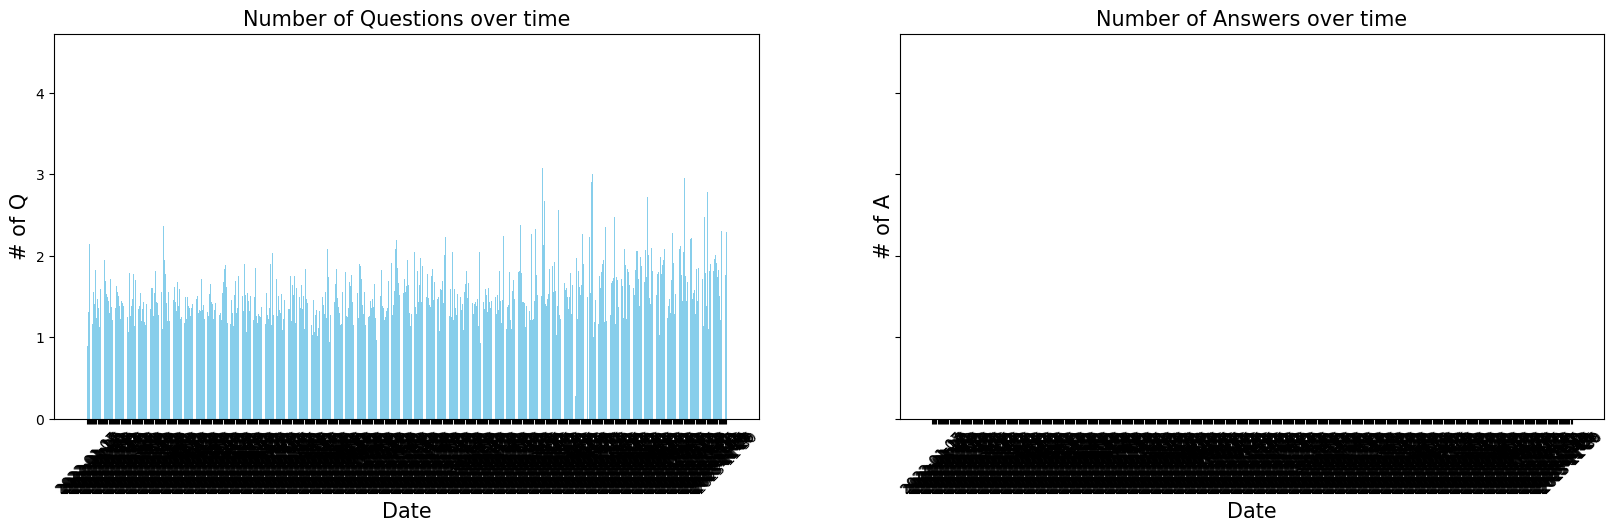

In [63]:
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 2, figsize = (20, 5), sharey=sharey, sharex=sharex)
# plt.xticks(rotation=45)
# major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
#                 ,'2021-11-30', '2022-11-30', '2023-11-30']
# yticks = np.arange(200, 2000, 400)
axs[0].bar(calc_ed_com_df['cdate']
        ,  calc_ed_com_df['Cognitive Complexity']
        ,  color = 'skyblue'
        # ,  edgecolor = 'black'
      ) # hist type

axs[0].set_title('Number of Questions over time', fontsize = 15)
axs[0].set_xlabel('Date', fontsize = 15)
axs[0].set_ylabel('# of Q', fontsize = 15)
# axs[0].set_xticks(major_xticks)
# axs[0].set_yticks(yticks)
# axs[0].axvline([major_xticks[-2]], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)
axs[0].tick_params(axis='x', rotation=45)
# axs[0].yticks(yt)

axs[0].bar(calc_ed_com_df['cdate']
        ,  calc_ed_com_df['Cognitive Complexity']
        ,  color = 'skyblue'
        # ,  edgecolor = 'black'
      ) # hist type

axs[1].set_title('Number of Answers over time', fontsize = 15)
axs[1].set_xlabel('Date', fontsize = 15)
axs[1].set_ylabel('# of A', fontsize = 15)
# axs[1].set_xticks(major_xticks)
# axs[1].set_yticks(yticks)
# axs[1].axvline([major_xticks[-2]], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)
axs[1].tick_params(axis='x', rotation=45)

plt.show();


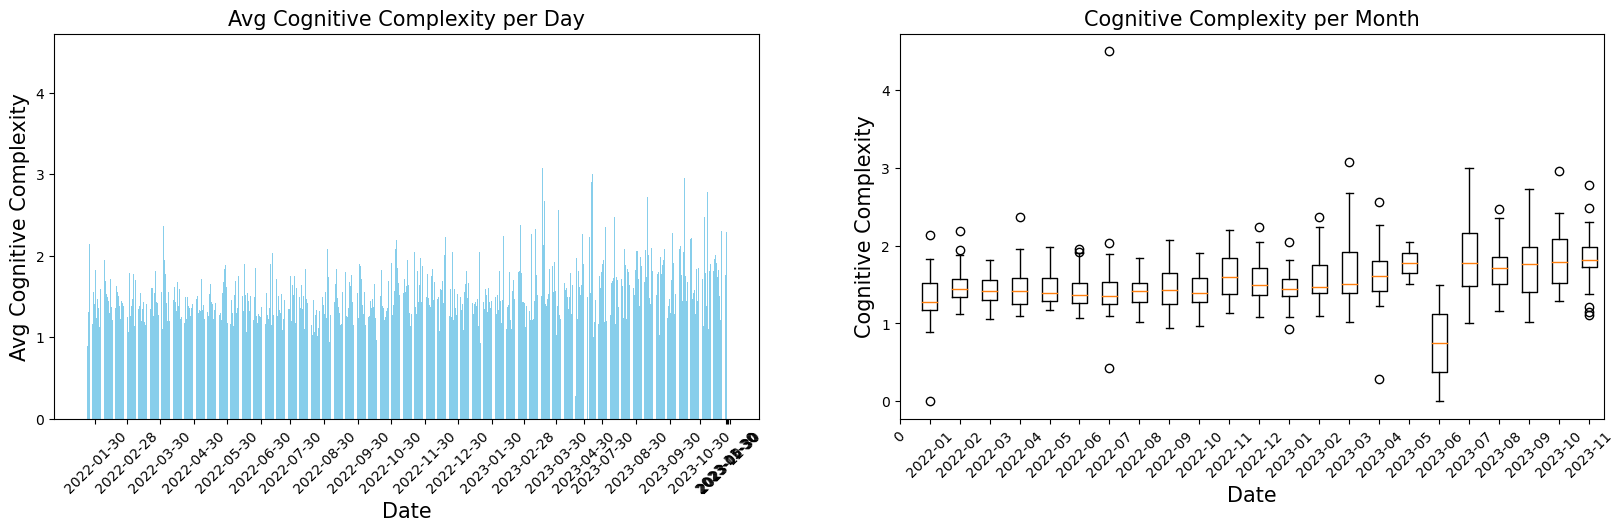

In [79]:
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 2, figsize = (20, 5), sharey=False, sharex=False)
# plt.xticks(rotation=45)
major_xticks = ['2022-01-30','2022-02-28','2022-03-30','2022-04-30','2022-05-30','2022-06-30','2022-07-30','2022-08-30','2022-09-30','2022-10-30','2022-11-30','2022-12-30',
                '2023-01-30','2023-02-28','2023-03-30','2023-04-30','2023-05-30','2023-06-30','2023-07-30','2023-08-30','2023-09-30','2023-10-30','2023-11-30','2023-12-30']
axs1_xticks = ym_list
axs1_xticks = np.insert(axs1_xticks, 0, '0')  # 인덱스 2 위치에 100을 추가 
# yticks = np.arange(200, 2000, 400)
axs[0].bar(calc_ed_com_df['cdate']
        ,  calc_ed_com_df['Cognitive Complexity']
        ,  color = 'skyblue'
        # ,  edgecolor = 'black'
      ) # hist type

axs[0].set_title('Avg Cognitive Complexity per Day', fontsize = 15)
axs[0].set_xlabel('Date', fontsize = 15)
axs[0].set_ylabel('Avg Cognitive Complexity', fontsize = 15)
axs[0].set_xticks(major_xticks)
# axs[0].set_yticks(yticks)
# axs[0].axvline([major_xticks[-2]], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)
axs[0].tick_params(axis='x', rotation=45)
# axs[0].yticks(yt)

axs[1].boxplot([calc_ed_com_box_df.loc[calc_ed_com_box_df['yyyymm']==x, 'Cognitive Complexity']  for x in ym_list]
        # ,  edgecolor = 'black'
      ) # hist type

axs[1].set_title('Cognitive Complexity per Month', fontsize = 15)
axs[1].set_xlabel('Date', fontsize = 15)
axs[1].set_ylabel('Cognitive Complexity', fontsize = 15)
axs[1].set_xticks(range(len(axs1_xticks)), axs1_xticks)
# axs[1].set_yticks(yticks)
# axs[1].axvline([major_xticks[-2]], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)
axs[1].tick_params(axis='x', rotation=45)

plt.show();


In [88]:
ym_list[:11]
# ym_list[12:]

array(['2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
       '2022-07', '2022-08', '2022-09', '2022-10', '2022-11'],
      dtype=object)

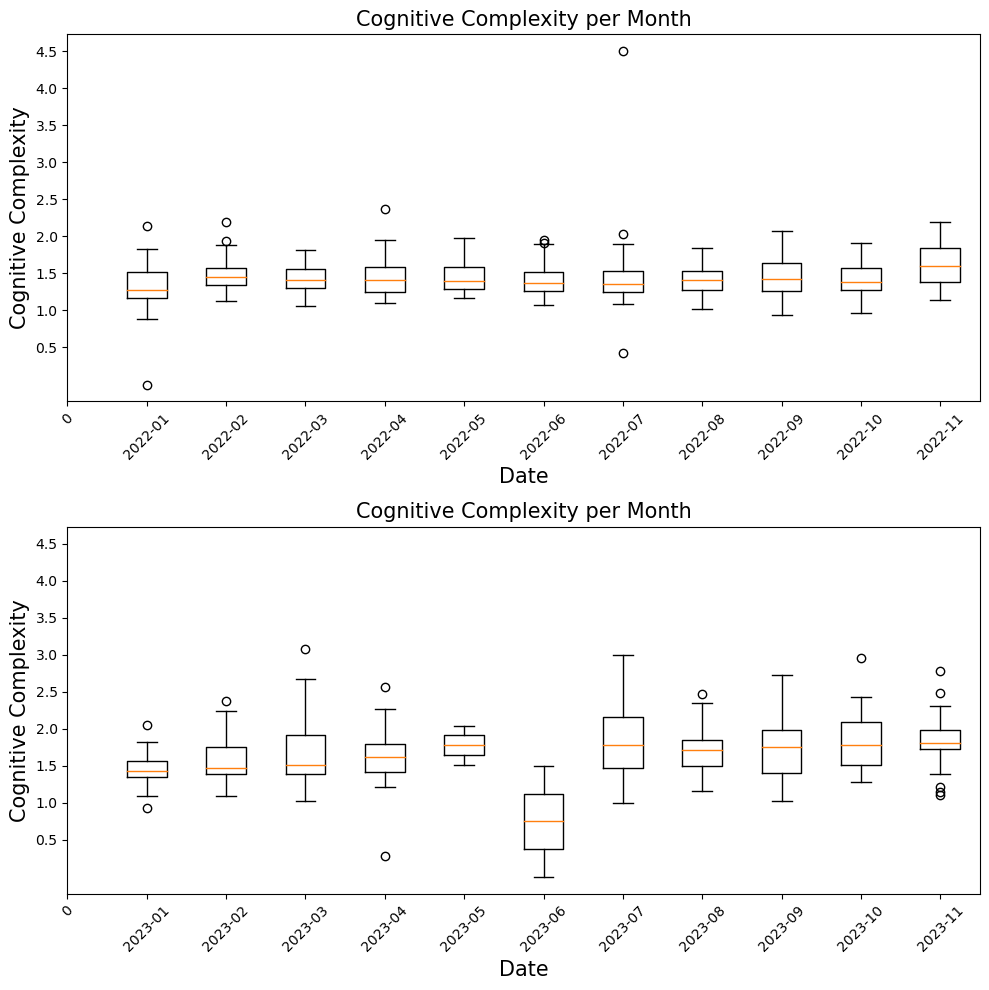

In [99]:
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(2, 1, figsize = (10, 10), sharey=True, sharex=False)
# plt.xticks(rotation=45)

axs0_xticks = ym_list[:11]
axs0_xticks = np.insert(axs0_xticks, 0, '0')  # 인덱스 2 위치에 100을 추가 

axs1_xticks = ym_list[12:]
axs1_xticks = np.insert(axs1_xticks, 0, '0')  # 인덱스 2 위치에 100을 추가 
yticks = np.arange(0.5, 5, 0.5)

axs[0].boxplot([calc_ed_com_box_df.loc[calc_ed_com_box_df['yyyymm']==x, 'Cognitive Complexity']  for x in ym_list[:11]]
        # ,  edgecolor = 'black'
      ) # hist type

axs[0].set_title('Cognitive Complexity per Month', fontsize = 15)
axs[0].set_xlabel('Date', fontsize = 15)
axs[0].set_ylabel('Cognitive Complexity', fontsize = 15)
axs[0].set_xticks(range(len(axs0_xticks)), axs0_xticks)
axs[0].set_yticks(yticks)
# axs[1].axvline([major_xticks[-2]], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)
axs[0].tick_params(axis='x', rotation=45)


axs[1].boxplot([calc_ed_com_box_df.loc[calc_ed_com_box_df['yyyymm']==x, 'Cognitive Complexity']  for x in ym_list[12:]]
        # ,  edgecolor = 'black'
      ) # hist type

axs[1].set_title('Cognitive Complexity per Month', fontsize = 15)
axs[1].set_xlabel('Date', fontsize = 15)
axs[1].set_ylabel('Cognitive Complexity', fontsize = 15)
axs[1].set_xticks(range(len(axs1_xticks)), axs1_xticks)
axs[1].set_yticks(yticks)
# axs[1].axvline([major_xticks[-2]], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)
axs[1].tick_params(axis='x', rotation=45)
plt.tight_layout()    
plt.show();


In [107]:
len(np.arange(2, 13, 1))

11

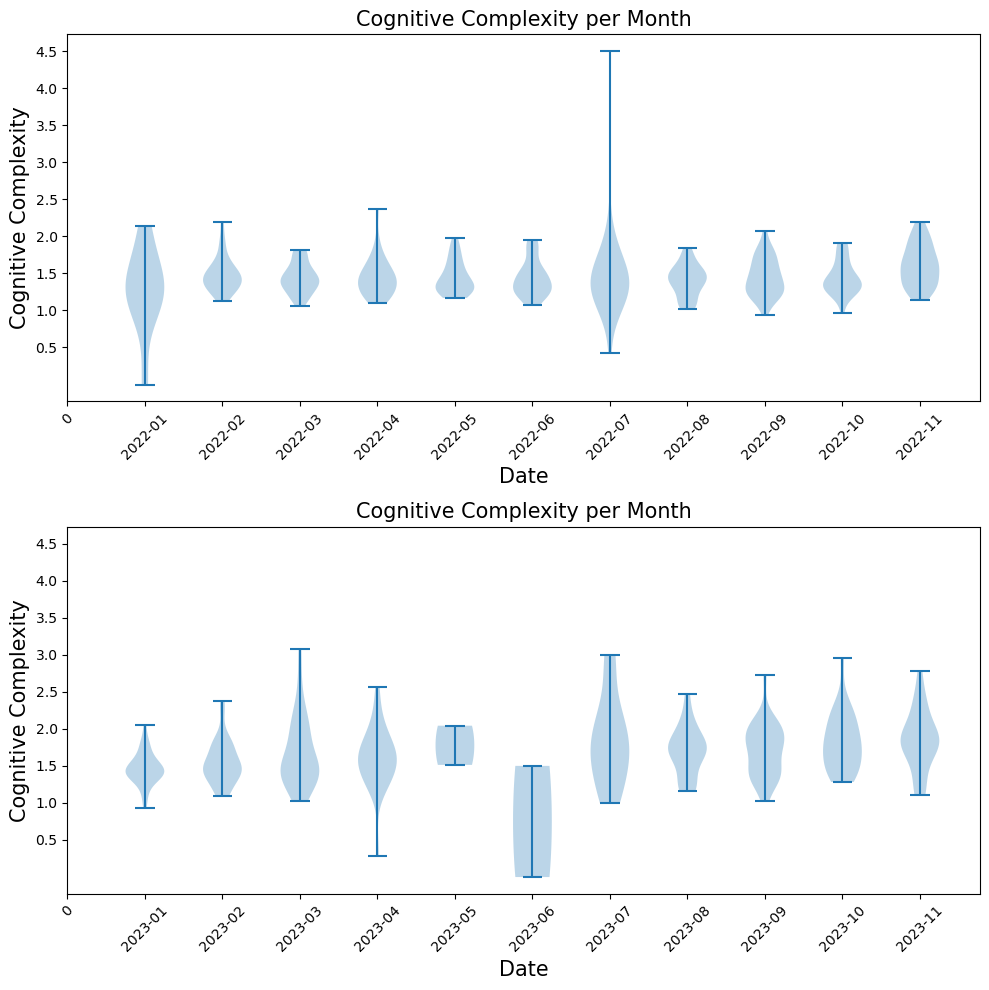

In [110]:
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(2, 1, figsize = (10, 10), sharey=True, sharex=False)
# plt.xticks(rotation=45)

axs0_xticks = ym_list[:11]
axs0_xticks = np.insert(axs0_xticks, 0, '0')  # 인덱스 2 위치에 100을 추가 

axs1_xticks = ym_list[12:]
axs1_xticks = np.insert(axs1_xticks, 0, '0')  # 인덱스 2 위치에 100을 추가 
yticks = np.arange(0.5, 5, 0.5)


axs[0].violinplot([calc_ed_com_box_df.loc[calc_ed_com_box_df['yyyymm']==x, 'Cognitive Complexity']  for x in ym_list[:11]], positions=np.arange(1, 12, 1))
axs[0].set_title('Cognitive Complexity per Month', fontsize = 15)
axs[0].set_xlabel('Date', fontsize = 15)
axs[0].set_ylabel('Cognitive Complexity', fontsize = 15)
axs[0].set_xticks(range(len(axs0_xticks)), axs0_xticks)
axs[0].set_yticks(yticks)
# axs[1].axvline([major_xticks[-2]], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)
axs[0].tick_params(axis='x', rotation=45)



axs[1].violinplot([calc_ed_com_box_df.loc[calc_ed_com_box_df['yyyymm']==x, 'Cognitive Complexity']  for x in ym_list[12:]], positions=np.arange(1, 12, 1))
axs[1].set_title('Cognitive Complexity per Month', fontsize = 15)
axs[1].set_xlabel('Date', fontsize = 15)
axs[1].set_ylabel('Cognitive Complexity', fontsize = 15)
axs[1].set_xticks(range(len(axs1_xticks)), axs1_xticks)
axs[1].set_yticks(yticks)
# axs[1].axvline([major_xticks[-2]], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)
axs[1].tick_params(axis='x', rotation=45)
plt.tight_layout()    
plt.show();
